# LUNG CANCER PREDICTION

# Importing libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))
import plotly.graph_objects as go
from collections import Counter
import dexplot as dxp

# Importing dataset

Attribute information:
Total no. of attributes: 16
No .of instances: 284

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2 , NO=1.

Yellow fingers: YES=2 , NO=1.

Anxiety: YES=2 , NO=1.

Peer_pressure: YES=2 , NO=1.

Chronic Disease: YES=2 , NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2 , NO=1.

Wheezing: YES=2 , NO=1.

Alcohol: YES=2 , NO=1.

Coughing: YES=2 , NO=1.

Shortness of Breath: YES=2 , NO=1.

Swallowing Difficulty: YES=2 , NO=1.

Chest pain: YES=2 , NO=1.

Lung Cancer: YES , NO.

In [44]:
df = pd.read_csv(r'C:\Users\dell\Desktop\survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Understanding our Data

In [45]:
#What is the shape of the dataset?
df.shape

(309, 16)

The dataset contains 309 rows and 16 columns.

In [46]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [47]:
#Some analysis on the numerical columns
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


The above function concludes:

AGE - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.

SMOKING - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.

YELLOW_FINGERS - The dataset is mostly composed of people with yellow fingers. Inferred from mean.

ANXIETY - The dataset is balanced in this regard.

PEER_PRESSURE - The dataset is balanced in this regard.

CHRONIC_DISEASE - The dataset is balanced in this regard.

FATIGUE - The dataset mostly composes of people with signs of fatigueness.

ALLERGY - The dataset mostly composes of people with allergy.

WHEEZING - The dataset mostly composes of people with wheezing symptom.

ALCOHOL CONSUMING - The dataset mostly composes of people who consumes alcohol.

COUGHING - The dataset mostly composes of people with coughing symptom.

SHORTNESS OF BREATH - The dataset mostly composes of people with shortness of breath.

SWALLOWING DIFFICULTY - The dataset mostly composes of people with not having difficulty with swallowing.

CHEST PAIN - The dataset mostly composes of people with chest pain.

In [48]:
#Check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values in the dataset.

In [49]:
#Check for duplicates in the dataset
df.duplicated().sum()

33

We have 33 duplicate values in our dataset. Let's drop these rows!

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.shape

(276, 16)

In [81]:
# Encoding of Categorical Data 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# Exploratory Data Analysis - EDA

In [53]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

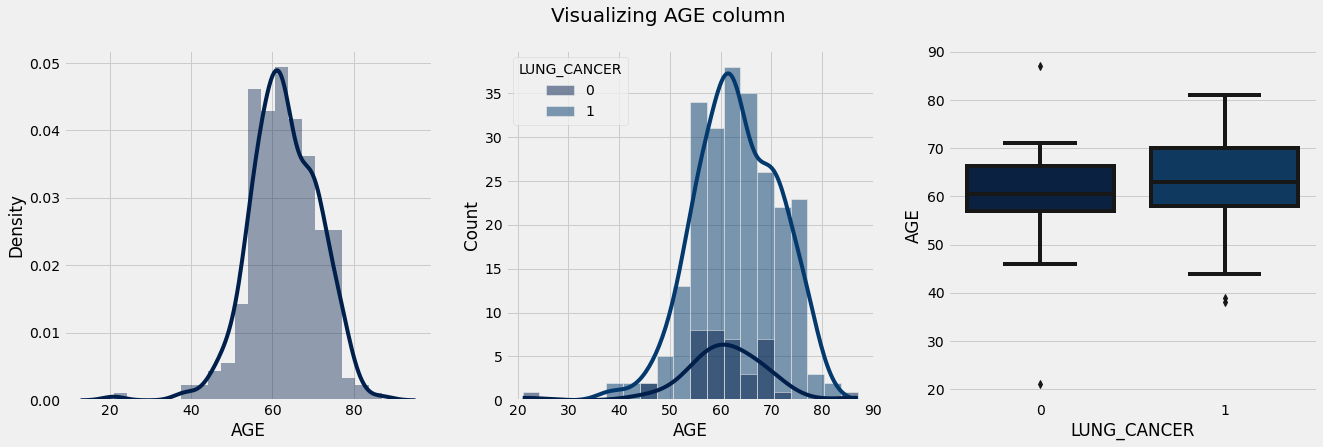

In [54]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Some outliers are present in the dataset. Inferred from box-plot.

Most common age ranges from 50-70. This was also inferred from describe method.

In [80]:
fig = go.Figure(data=[go.Pie(labels=list(Counter(df['LUNG_CANCER']).keys()),
                     values=list(Counter(df['LUNG_CANCER']).values()),
                     title='Lung Cancer Count Distribution',
                     name='')])
fig.update_traces(textfont_size=20)
fig.update_layout(font=dict(size=18))

fig.show()

86.2% of the people are having lung disease whereas 13.8% are healthy.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

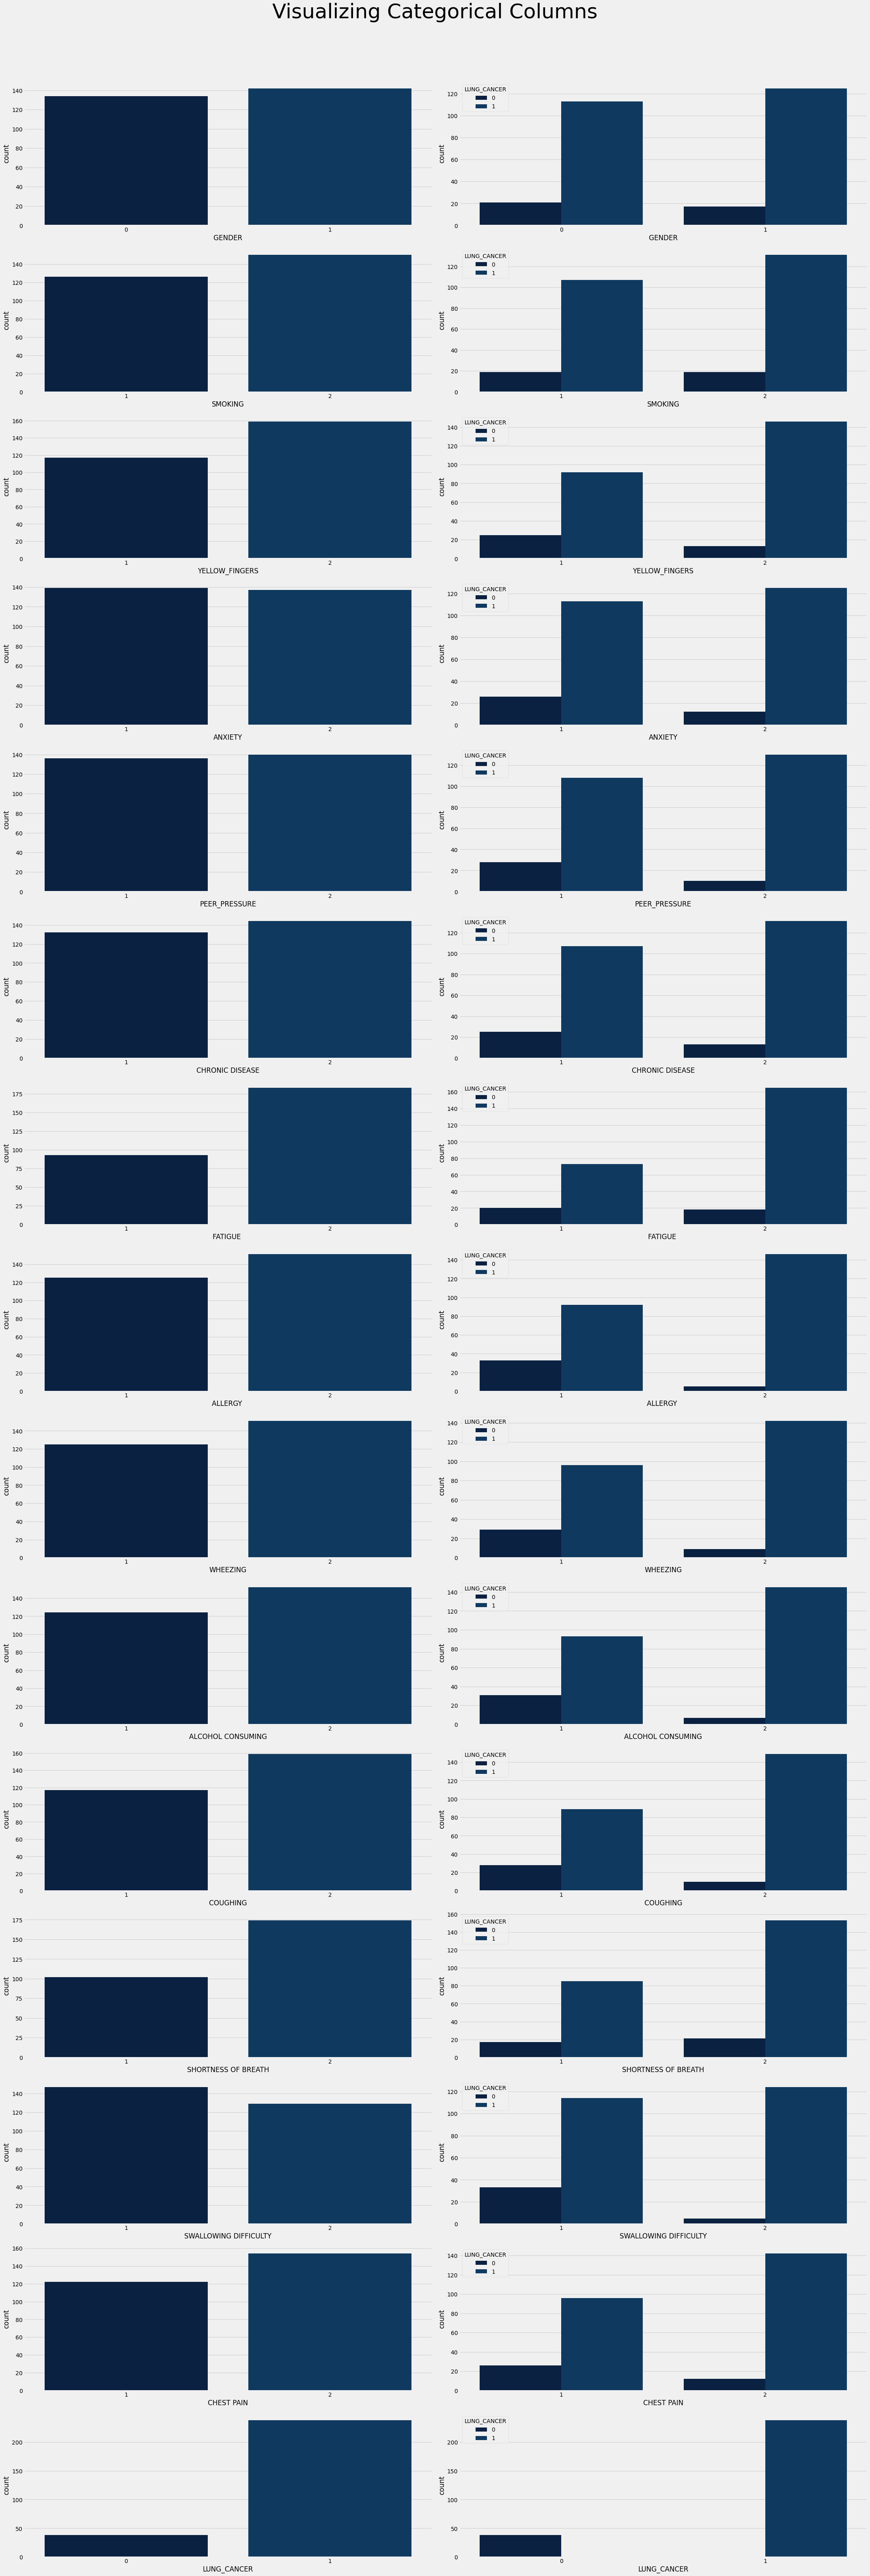

In [55]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

There is a huge imabalance present in the dataset. Samples with Lung Cancer are present in higher numbers.

All the observations made from describe function is confirmed here.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


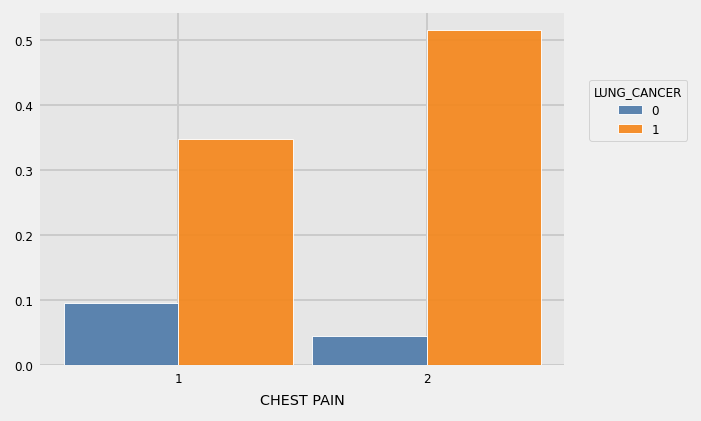

In [85]:
# Lets visualize the number of cigarattes one Smoke and whether he suffers from 
# Lung Cancer or not

dxp.count(val='CHEST PAIN', data=df, figsize=(4,3), split = 'LUNG_CANCER', normalize=True)

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

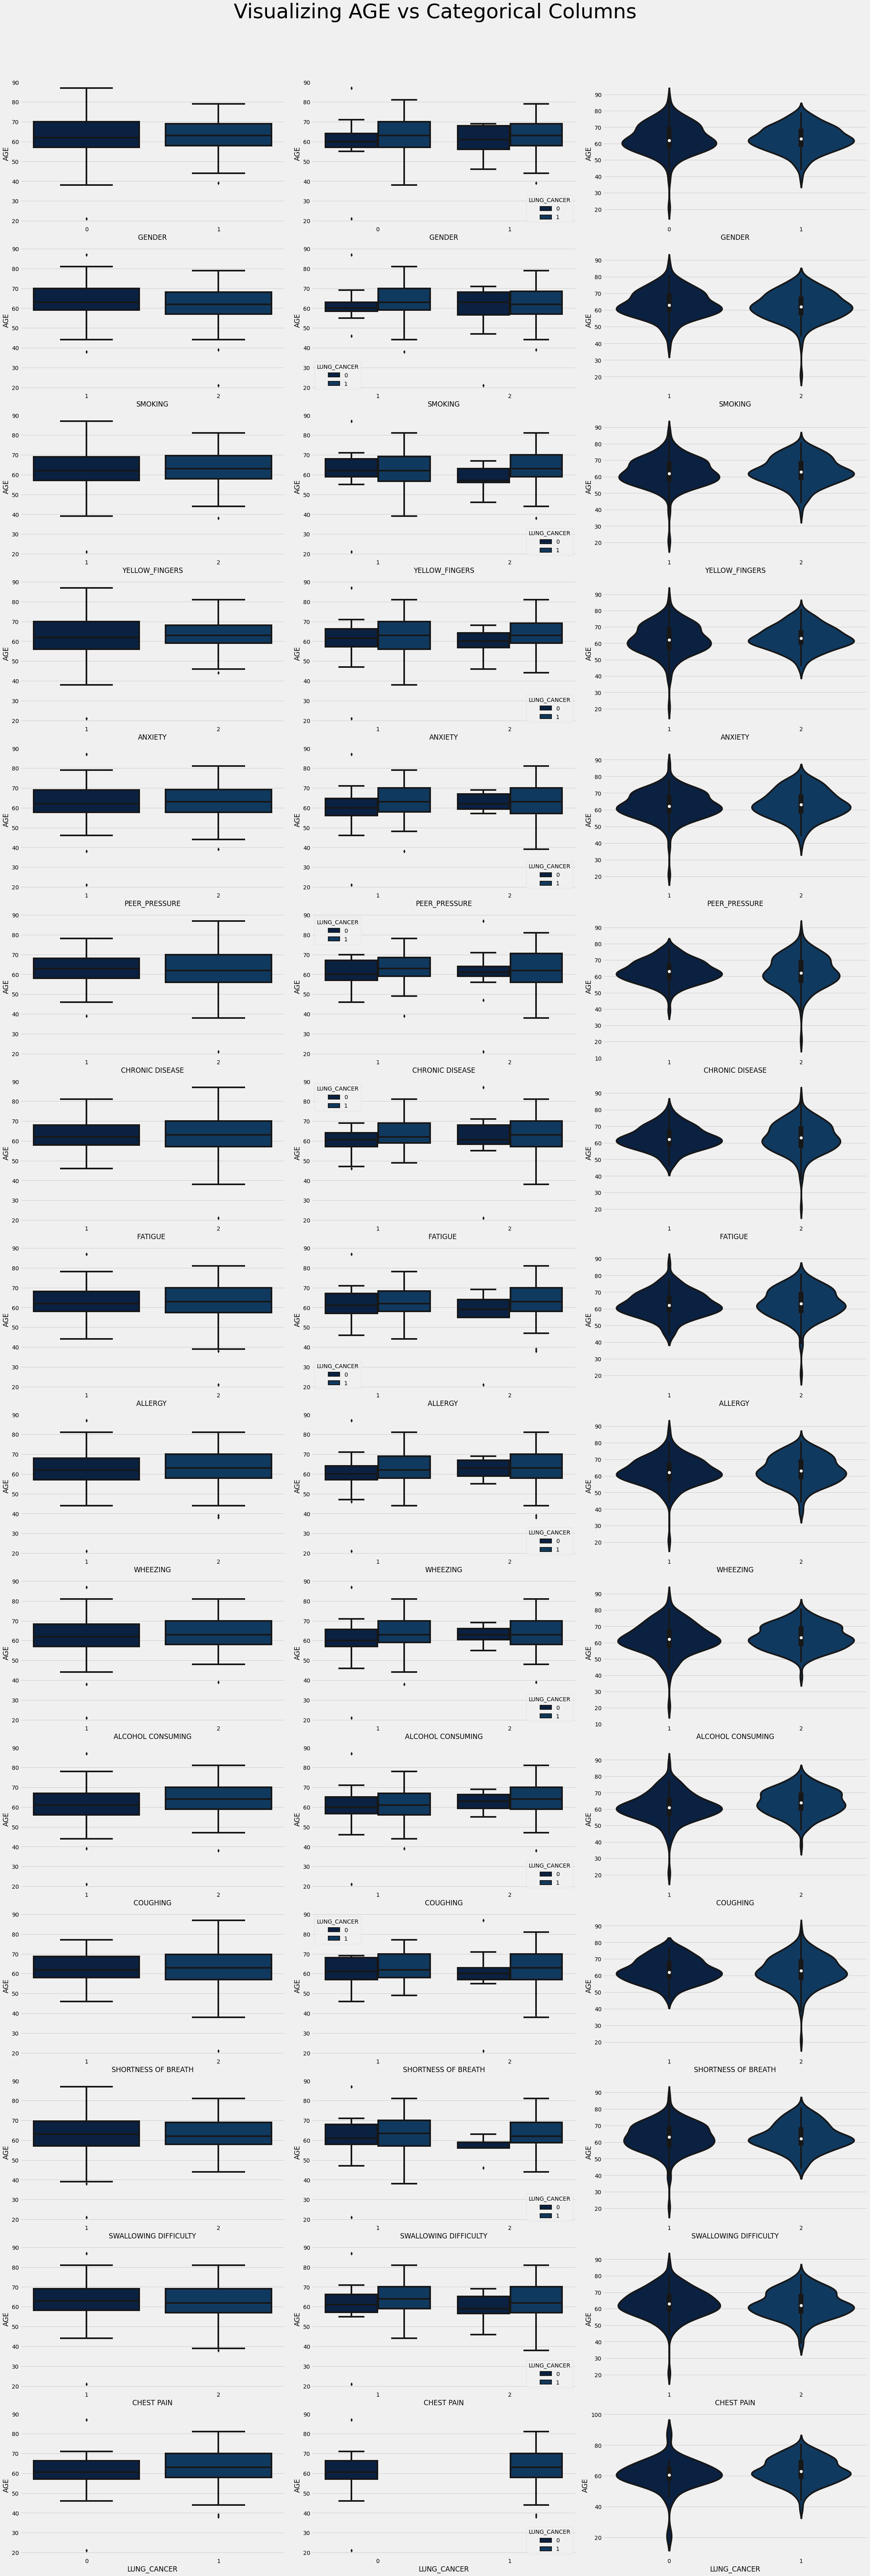

In [56]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

<AxesSubplot:>

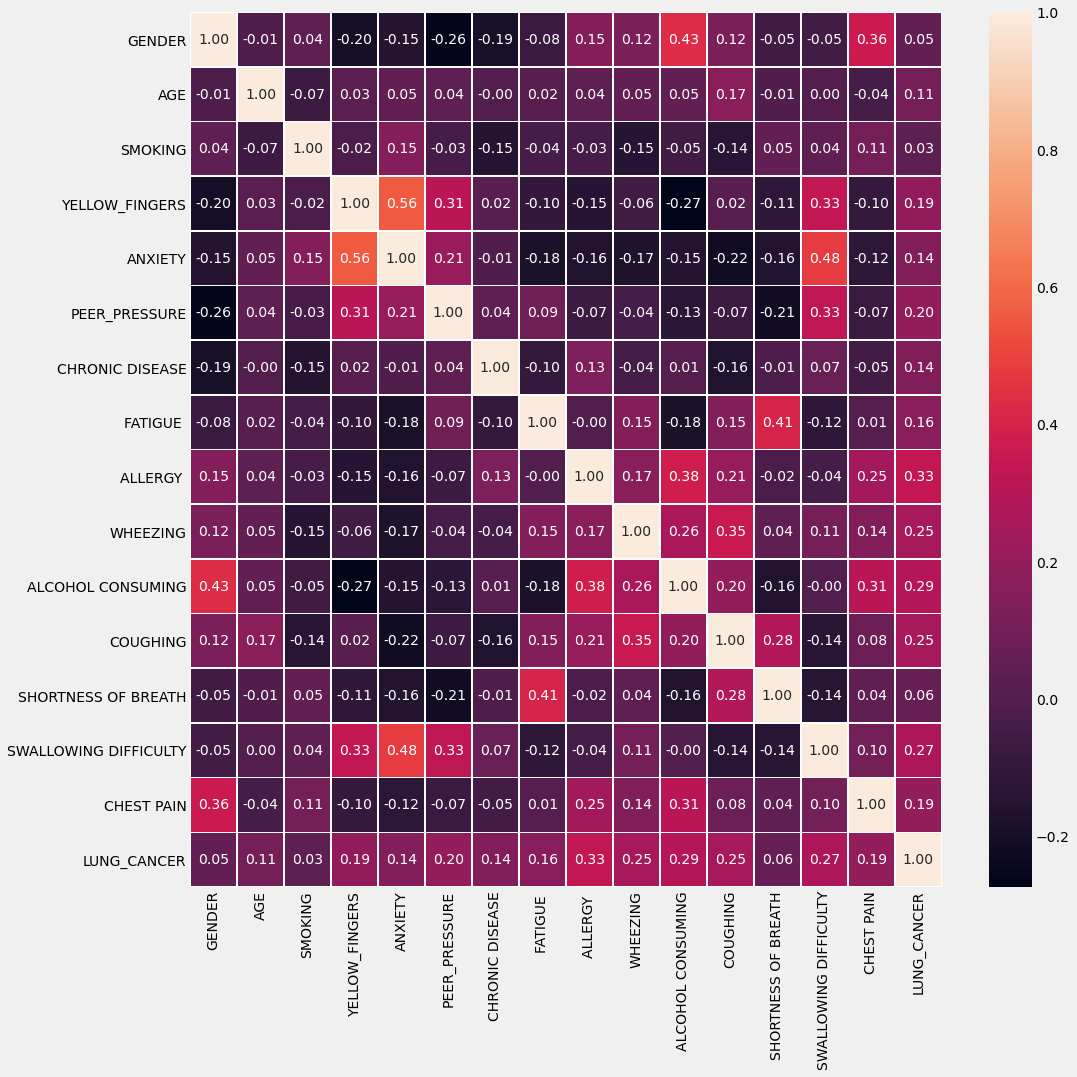

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

There is multicollinearity present in the data.

# Data Pre-processing

In [58]:
#Separating independent & dependent features
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [59]:
#Changing values of columns from 2,1 to 1,0
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [60]:
#Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [61]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [62]:
#Scaling of AGE column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,0,-0.563902,1,1,0,0,0,0,0,0,0,0,1,0,0
336,0,-0.343647,1,0,0,0,1,1,1,0,0,0,1,0,0
334,0,-0.784158,1,0,1,0,0,1,0,0,0,0,0,0,0
151,0,0.206990,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,0.537373,0,1,0,0,0,0,0,1,0,1,1,0,0


# Model Building

# KNeighbors Classifier

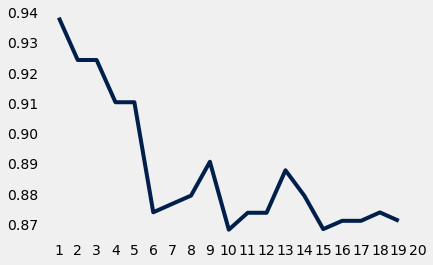

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



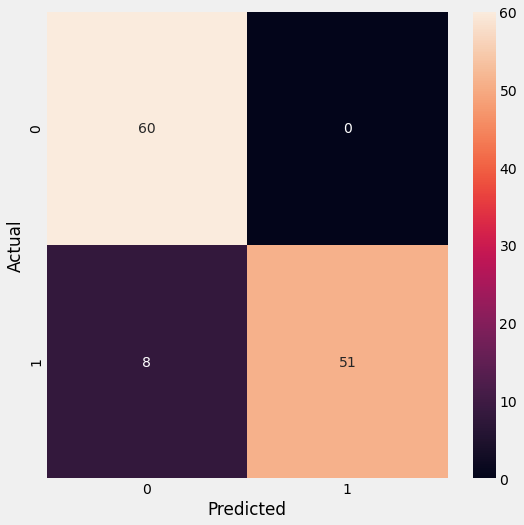

In [64]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

#  Support Vector Machine

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       1.00      0.92      0.96        59

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119


Best Parameters of SVC model is : {'gamma': 1, 'C': 100}



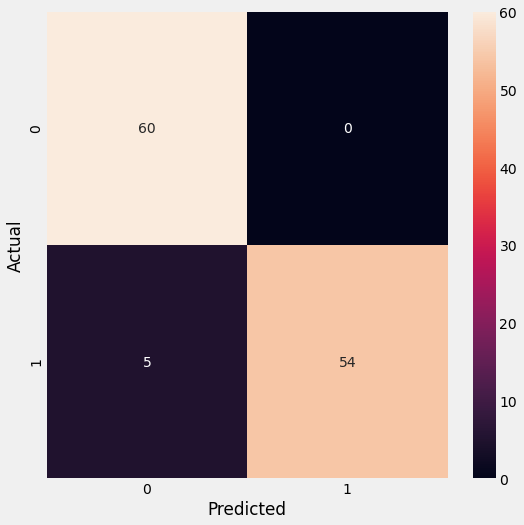

In [74]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
svc=RandomizedSearchCV(SVC(),param_grid,cv=5)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
confusion_svc=confusion_matrix(y_test,svc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {svc.best_params_}\n')

# Logistic Regression 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.86      0.85      0.85        59

    accuracy                           0.86       119
   macro avg       0.86      0.86      0.86       119
weighted avg       0.86      0.86      0.86       119



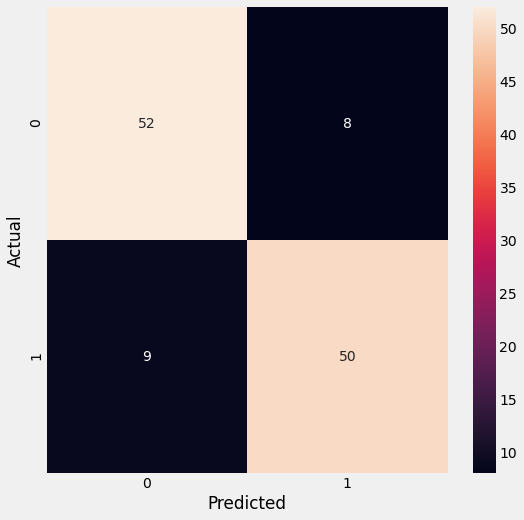

In [66]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameter: {'max_depth': 7}



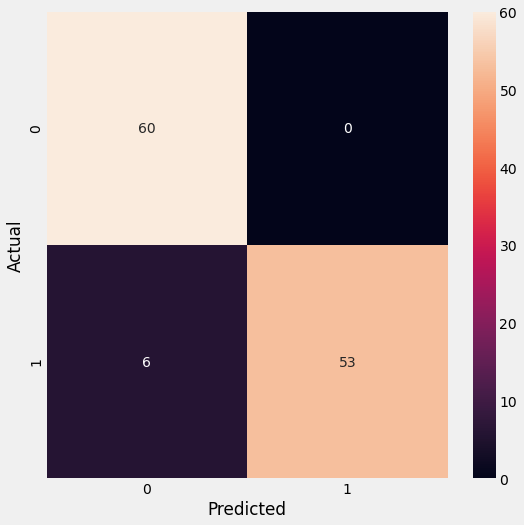

In [67]:
param_grid = {
'max_depth' : [3, 5, 7],
}
dtc=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
confusion_dtc=confusion_matrix(y_test,dtc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_dtc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_dtc))
print(f'\nBest Parameter: {dtc.best_params_}\n')

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119


Best Parameter: {'n_estimators': 75}



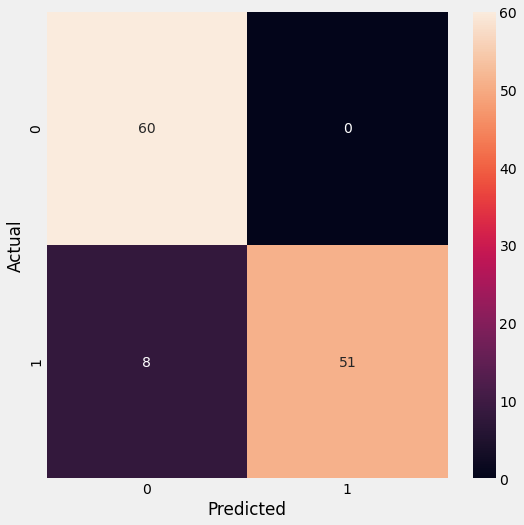

In [69]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

# Comparison of different Machine Learning Models

In [75]:
# importing libraries for accuracy test
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

#calculating accuracy metrics
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'KNN':[accuracy_score(y_test,knn.predict(X_test)), f1_score(y_test,knn.predict(X_test)), recall_score(y_test,knn.predict(X_test)), precision_score(y_test,knn.predict(X_test)), r2_score(y_test,knn.predict(X_test))],
        'SVM':[accuracy_score(y_test,svc.predict(X_test)), f1_score(y_test,svc.predict(X_test)), recall_score(y_test,svc.predict(X_test)), precision_score(y_test,svc.predict(X_test)), r2_score(y_test,svc.predict(X_test))],
        'LR':[accuracy_score(y_test,log.predict(X_test)), f1_score(y_test,log.predict(X_test)), recall_score(y_test,log.predict(X_test)), precision_score(y_test,log.predict(X_test)), r2_score(y_test,log.predict(X_test))],
        'DT':[accuracy_score(y_test,dtc.predict(X_test)), f1_score(y_test,dtc.predict(X_test)), recall_score(y_test,dtc.predict(X_test)), precision_score(y_test,dtc.predict(X_test)), r2_score(y_test,dtc.predict(X_test))],
      'RF':[accuracy_score(y_test,rcv.predict(X_test)), f1_score(y_test,rcv.predict(X_test)), recall_score(y_test,rcv.predict(X_test)), precision_score(y_test,rcv.predict(X_test)), r2_score(y_test,rcv.predict(X_test))]
   
     
}
chart = pd.DataFrame(chart)

In [76]:
# displaying the result
display(chart)

,Metric,KNN,SVM,LR,DT,RF
0,Accuracy,0.932773,0.957983,0.857143,0.949580,0.932773
1,F1-Score,0.927273,0.955752,0.854701,0.946429,0.927273
2,Recall,0.864407,0.915254,0.847458,0.898305,0.864407
3,Precision,1.000000,1.000000,0.862069,1.000000,1.000000
4,R2-Score,0.731073,0.831921,0.428531,0.798305,0.731073


# Selected Model - SVM

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.97      0.97      0.97        59

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



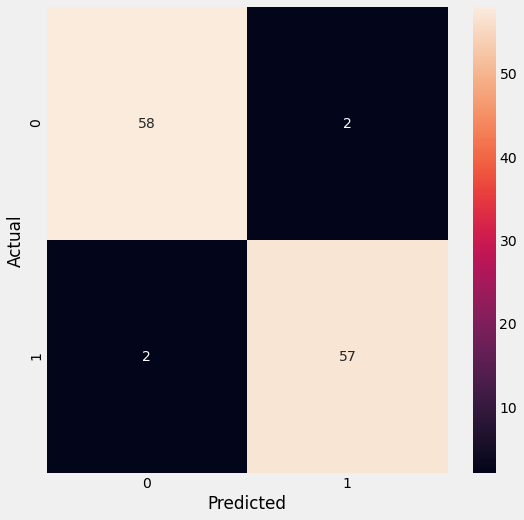

In [26]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

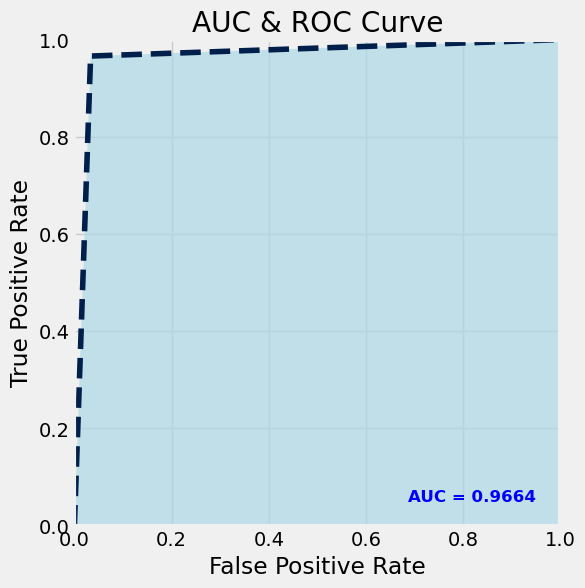

In [27]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Conclusion

Support Vector Machine is selected.

* Recall - 98%

* Accuracy - 99%

* It has only one missclassification.

* AUC - 0.9915